## Creating CNN Using Scratch And Transfer Learning

In [1]:
# pip install matplotlib


In [2]:
# import the libraries as shown below
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
from PIL import Image
import scipy
import matplotlib.pyplot as plt


In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_image/Train'
valid_path = 'cell_image/Test'


In [4]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [5]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('cell_image/Train/*')

In [7]:
folders

['cell_image/Train\\Parasitized', 'cell_image/Train\\Uninfected']

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
from tensorflow.keras.layers import MaxPooling2D



In [12]:
### Create Model from scratch using CN

input_shape = (224, 224, 3) 
# Create a Sequential model
model = Sequential()
# Add the Input layer with the specified input shape
model.add(Input(shape=input_shape))

model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [13]:
# model = Sequential()
# #The rectified linear unit (ReLU) or rectifier activation function introduces the property of nonlinearity to a deep learning model 
# # and solves the vanishing gradients issue.
# # Step 1 - Convolution
# model.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))

# # Step 2 - Pooling
# model.add(MaxPooling2D(pool_size = (2, 2)))

# # Adding a second convolutional layer
# model.add(Conv2D(32, (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))
# #adding 3rd layer
# model.add(Conv2D(32, (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))

# # Step 3 - Flattening
# model.add(Flatten())

# # Step 4 - Full connection
# model.add(Dense(units = 128, activation = 'relu'))
# model.add(Dense(units = 1, activation = 'sigmoid'))

In [14]:
# # from keras.models import Sequential
# # from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input
# from keras.layers import  MaxPooling2D

# # Define the input shape
# input_shape = (224, 224, 3)  # Assuming RGB images with dimensions 224x224

# # Create a Sequential model
# model = Sequential()

# # Add the Input layer with the specified input shape
# model.add(Input(shape=input_shape))

# # Step 1 - Convolution
# model.add(Conv2D(32, (3, 3), activation='relu'))

# # Step 2 - Pooling
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Adding a second convolutional layer
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Adding a third convolutional layer
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Step 3 - Flattening
# model.add(Flatten())

# # Step 4 - Full connection
# model.add(Dense(units=128, activation='relu'))
# model.add(Dense(units=1, activation='softmax'))

# # Compile the model
# # model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Now you can fit your model with training data and perform other tasks


In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [16]:
# Use the Image Data Generator to import the images from the dataset
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('cell_image/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 22046 images belonging to 2 classes.


In [18]:
training_set

In [19]:
test_set = test_datagen.flow_from_directory('cell_image/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5512 images belonging to 2 classes.


In [21]:

r=model.fit(training_set,
            epochs = 32,
            validation_data = test_set,
            steps_per_epoch = len(training_set),
            validation_steps = len(test_set))

Epoch 1/32
689/689 [==============================] - 184s 259ms/step - loss: 0.3328 - accuracy: 0.8709 - val_loss: 0.1974 - val_accuracy: 0.9385
Epoch 2/32
689/689 [==============================] - 163s 237ms/step - loss: 0.2001 - accuracy: 0.9397 - val_loss: 0.1761 - val_accuracy: 0.9452
Epoch 3/32
689/689 [==============================] - 164s 238ms/step - loss: 0.1796 - accuracy: 0.9467 - val_loss: 0.2105 - val_accuracy: 0.9443
Epoch 4/32
689/689 [==============================] - 171s 248ms/step - loss: 0.1626 - accuracy: 0.9501 - val_loss: 0.1524 - val_accuracy: 0.9523
Epoch 5/32
689/689 [==============================] - 167s 242ms/step - loss: 0.1579 - accuracy: 0.9516 - val_loss: 0.1927 - val_accuracy: 0.9436
Epoch 6/32
689/689 [==============================] - 166s 241ms/step - loss: 0.1459 - accuracy: 0.9542 - val_loss: 0.1475 - val_accuracy: 0.9548
Epoch 7/32
689/689 [==============================] - 165s 240ms/step - loss: 0.1406 - accuracy: 0.9551 - val_loss: 0.1508 -

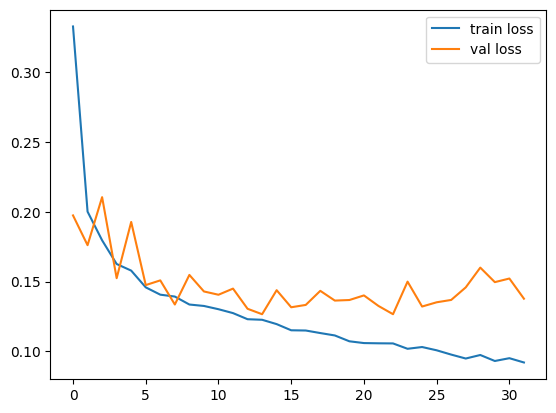

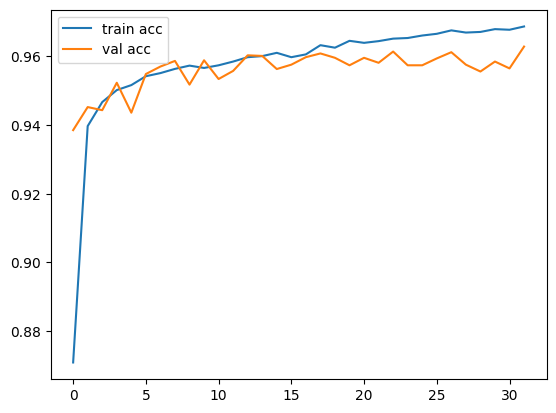

<Figure size 640x480 with 0 Axes>

In [22]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
# pip install scikit-learn

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

import numpy as np
y_pred = model.predict(test_set)
predicted_classes = np.argmax(y_pred, axis=1)

# Get true labels from the test set generator
true_classes = test_set.classes

# Get class labels
class_labels = list(test_set.class_indices.keys())

# Create confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Get classification report for more detailed evaluation
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


173/173 [==============================] - 7s 39ms/step
Confusion Matrix:
[[1371 1385]
 [1350 1406]]

Classification Report:
              precision    recall  f1-score   support

 Parasitized       0.50      0.50      0.50      2756
  Uninfected       0.50      0.51      0.51      2756

    accuracy                           0.50      5512
   macro avg       0.50      0.50      0.50      5512
weighted avg       0.50      0.50      0.50      5512



In [33]:
# pip install seaborn

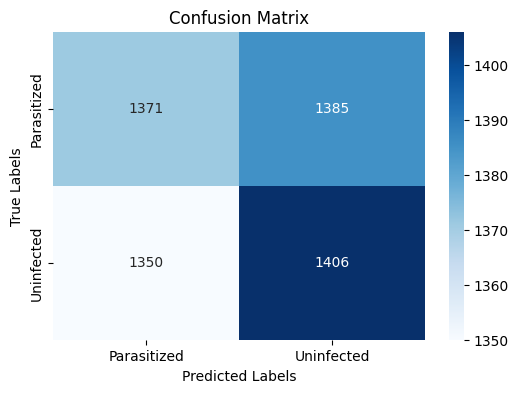

In [36]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

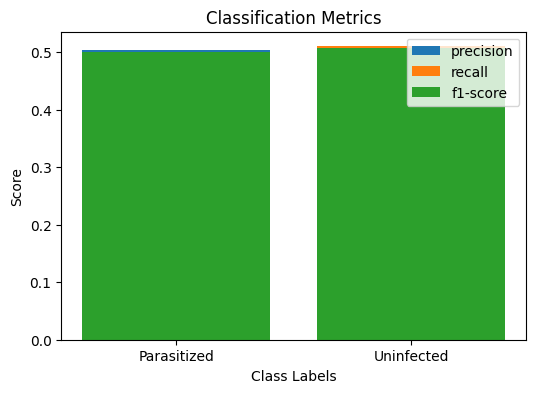

In [37]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)

# Extract metrics for plotting
metrics = ['precision', 'recall', 'f1-score']
classes = list(report.keys())[:-3]  # Exclude 'micro avg', 'macro avg', 'weighted avg'

# Plot metrics for each class
plt.figure(figsize=(6, 4))
for metric in metrics:
    values = [report[class_label][metric] for class_label in classes]
    plt.bar(classes, values, label=metric)

plt.xlabel('Class Labels')
plt.ylabel('Score')
plt.title('Classification Metrics')
plt.legend()
plt.show()

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19_.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg19_.h5')

In [ ]:
# img=image.load_img('cell_image/test/Parasitized/C99P60ThinF_IMG_20150918_142334_cell_39.png',target_size=(224,224))



In [ ]:
img=image.load_img('cell_image/test/Uninfected/C99P60ThinF_IMG_20150918_141520_cell_38.png',target_size=(224,224))

In [ ]:
display(img)

In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
from keras.applications.vgg19 import preprocess_input
# import numpy as np

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
# img_data = img_data.squeeze(axis=0) 
# img_data.shape
# # Remove the extra dimension
# # model.predict(img_data)

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
print(a)

In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")